In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/dummypath/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

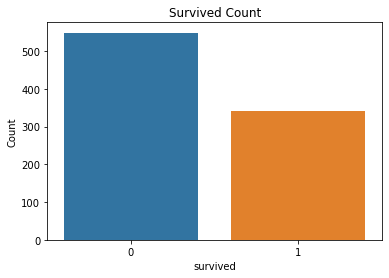

<Figure size 576x864 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
sns.countplot(x='Survived',data=df)
plt.xlabel('survived')
plt.ylabel('Count')
plt.title("Survived Count")
plt.figure(figsize=(8,12))
plt.show()

In [7]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

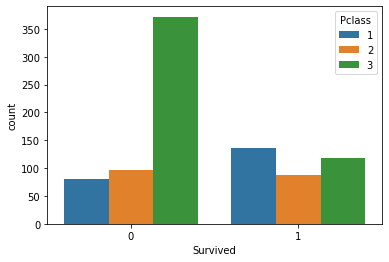

In [8]:
sns.countplot(x='Survived',data=df,hue='Pclass')

In [9]:
df["Age"].fillna(round(df["Age"].mean(),1),inplace=True)

In [10]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
round(df["Age"].describe(),2)

count    891.00
mean      29.70
std       13.00
min        0.42
25%       22.00
50%       29.70
75%       35.00
max       80.00
Name: Age, dtype: float64

In [14]:
df["Family"] = df["SibSp"] + df["Parch"]
df.drop(["SibSp","Parch","Cabin","Name","Ticket"],axis=1,inplace=True)

In [15]:
df = pd.get_dummies(df,prefix=["Sex","Embarked"])

In [16]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,1,0,1,0,0,1
1,2,1,1,38.0,71.2833,1,1,0,1,0,0
2,3,1,3,26.0,7.9250,0,1,0,0,0,1
3,4,1,1,35.0,53.1000,1,1,0,0,0,1
4,5,0,3,35.0,8.0500,0,0,1,0,0,1


In [17]:
df.drop("PassengerId",axis=1,inplace=True)

In [18]:
y = df["Survived"]

In [19]:
X = df.drop("Survived",axis=1)

In [20]:
X.head()

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,1,0,1,0,0,1
1,1,38.0,71.2833,1,1,0,1,0,0
2,3,26.0,7.9250,0,1,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,0,1
4,3,35.0,8.0500,0,0,1,0,0,1


In [21]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X,y)

LogisticRegression(max_iter=1000)

In [22]:
df_test = pd.read_csv("/dummypath/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
df_test.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [24]:
df_test["Family"] = df_test["SibSp"] + df_test["Parch"]
df_test["Age"].fillna(round(df_test["Age"].mean(),2),inplace=True)
df_test["Fare"].fillna(round(df["Fare"].mean(),2),inplace=True)
df_test.drop(["SibSp","Parch"],axis=1,inplace=True)
df_test = pd.get_dummies(df_test,prefix=["Sex","Embarked"])
df_test.head()

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,7.8292,0,0,1,0,1,0
1,3,47.0,7.0000,1,1,0,0,0,1
2,2,62.0,9.6875,0,0,1,0,1,0
3,3,27.0,8.6625,0,0,1,0,0,1
4,3,22.0,12.2875,2,1,0,0,0,1


In [25]:
y_pred = lr.predict(df_test)

In [26]:
lr.score(df_test,y_pred)

1.0

In [27]:
lr.score(X,y)

0.8024691358024691

In [28]:
df_csv = pd.read_csv("/dummypath/Desktop/test.csv")
y_df = pd.DataFrame(y_pred,columns=['Survived'])
df_csv = pd.concat([df_csv,y_df],axis=1)
df_csv.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [29]:
df_csv.to_csv('/dummypath/submission.csv')